In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

sns.set_style("whitegrid")
sns.set_palette("husl")

In [ ]:
model_data = {
    'Model': ['Pegasus', 'BART', 'T5', 'Flan-T5', 'Lead-2', 'TextRank',
              'GPT (Default)', 'GPT (Feature-Preserving)', 'GPT (Legal)', 'GPT (Bias-Aware)'],
    'Type': ['Abstractive', 'Abstractive', 'Abstractive', 'Abstractive',
             'Extractive', 'Extractive', 'API', 'API', 'API', 'API'],
    'Overall_Preservation_Curated': [52.8, 90.6, 81.2, 76.9, 93.2, 91.6, 57.6, 79.9, 65.6, 72.2],
    'Overall_Preservation_Pilot': [65.7, 88.0, 83.0, 70.8, 94.2, 94.0, 72.6, 84.1, 78.0, 80.5],
    'Hedge_Preservation_Curated': [73.0, 72.8, 63.0, 51.9, 92.2, 91.6, 73.0, 85.0, 78.0, 80.0],
    'Hedge_Preservation_Pilot': [83.4, 60.5, 36.8, 47.4, 94.2, 94.0, 89.0, 92.0, 88.0, 90.0],
    'Disfluency_Preservation_Curated': [84.2, 76.9, 46.2, 43.6, 97.0, 94.4, 74.2, 82.0, 78.3, 81.3],
    'Disfluency_Preservation_Pilot': [70.9, 74.5, 57.4, 44.7, 98.9, 96.6, 74.1, 76.0, 79.0, 79.0],
    'Complete_Loss_Curated': [26.6, 6.1, 10.6, 13.6, 2.2, 6.0, 29.5, 10.6, 18.0, 15.0],
    'Complete_Loss_Pilot': [30.2, 2.6, 5.4, 8.5, 1.8, 5.4, 16.3, 7.5, 10.0, 9.0],
    'Compression_Ratio': [24, 239, 239, 282, 92.1, 94.2, 45, 48, 46, 47],
    'ROUGE_L': [13.9, 92.3, 55.0, 50.0, 93.0, 95.8, 75.0, 73.0, 74.0, 72.0],
    'BERTScore': [15.8, 91.0, 55.0, 49.0, 96.0, 97.8, 82.0, 80.0, 81.0, 79.0],
    'Certainty_Inflation': ['High', 'Low', 'Moderate', 'High', 'None', 'None', 'Moderate', 'Low', 'Low', 'Low'],
    'Disfluency_Sanitization': [25.0, 5.8, 13.5, 19.0, 1.1, 4.4, 25.9, 18.0, 21.0, 18.7]
}

df = pd.DataFrame(model_data)

#average preservation
df['Avg_Preservation'] = (df['Overall_Preservation_Curated'] + df['Overall_Preservation_Pilot']) / 2
df['Avg_Disfluency'] = (df['Disfluency_Preservation_Curated'] + df['Disfluency_Preservation_Pilot']) / 2
df['Avg_Complete_Loss'] = (df['Complete_Loss_Curated'] + df['Complete_Loss_Pilot']) / 2

fig = plt.figure(figsize=(20, 24))

<Figure size 2000x2400 with 0 Axes>

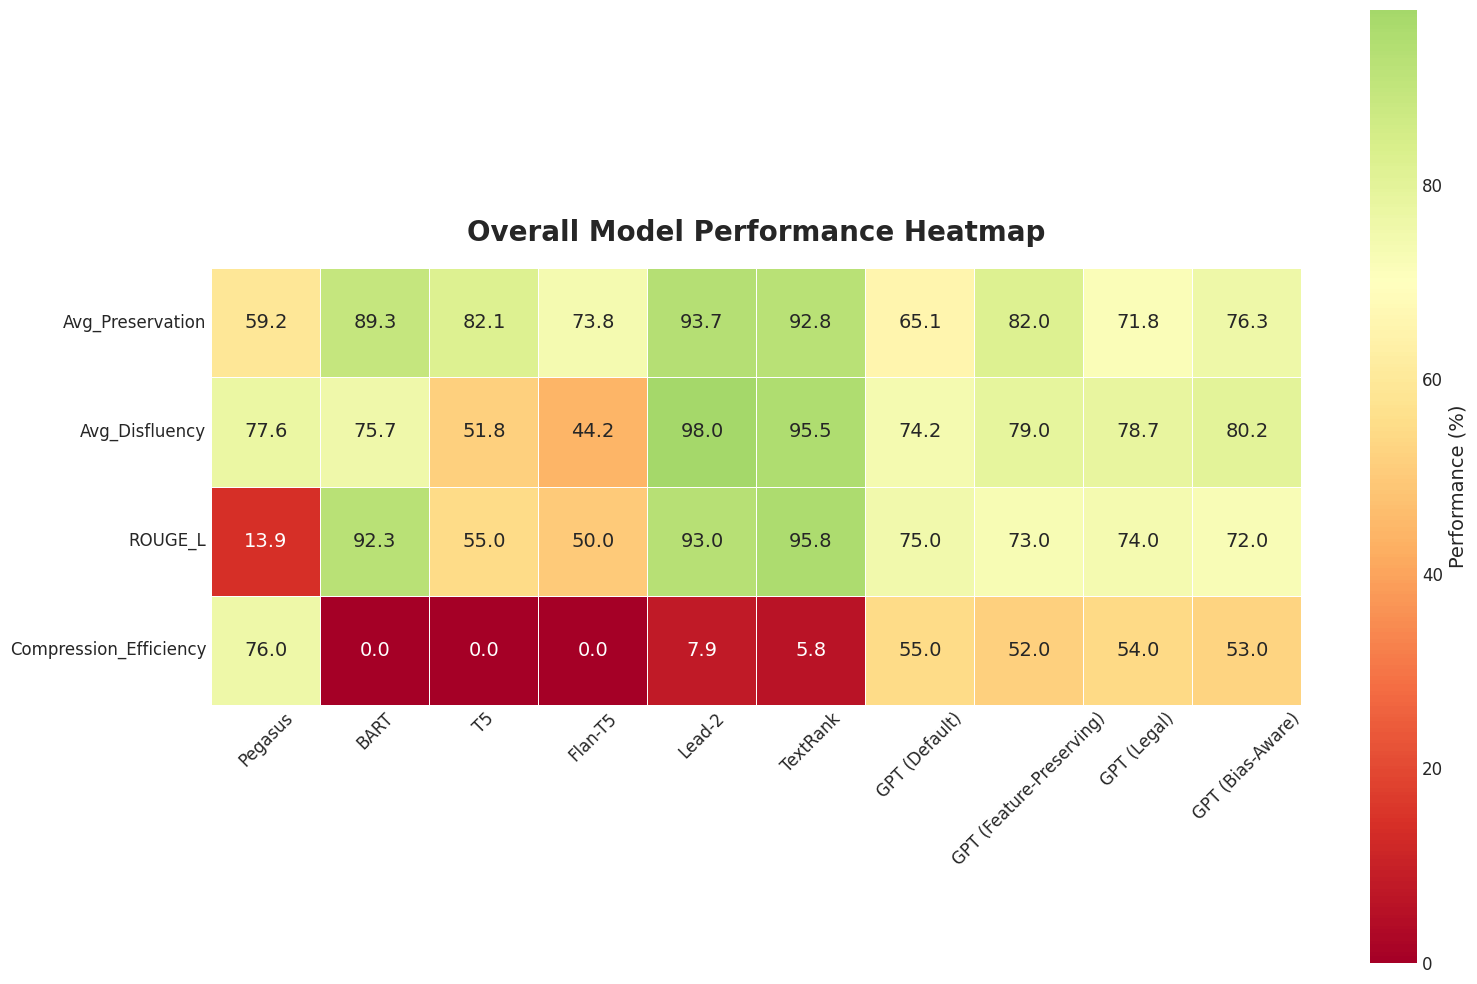

In [ ]:
fig1 = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(111)
heatmap_data = df[['Model', 'Avg_Preservation', 'Avg_Disfluency', 'ROUGE_L', 'Compression_Ratio']].set_index('Model')
heatmap_data['Compression_Efficiency'] = 100 - heatmap_data['Compression_Ratio'].clip(upper=100)
heatmap_data = heatmap_data.drop('Compression_Ratio', axis=1)
sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='RdYlGn', center=70,
            cbar_kws={'label': 'Performance (%)'}, linewidths=0.5,
            annot_kws={'fontsize': 14}, square=True)
ax1.set_title('Overall Model Performance Heatmap', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


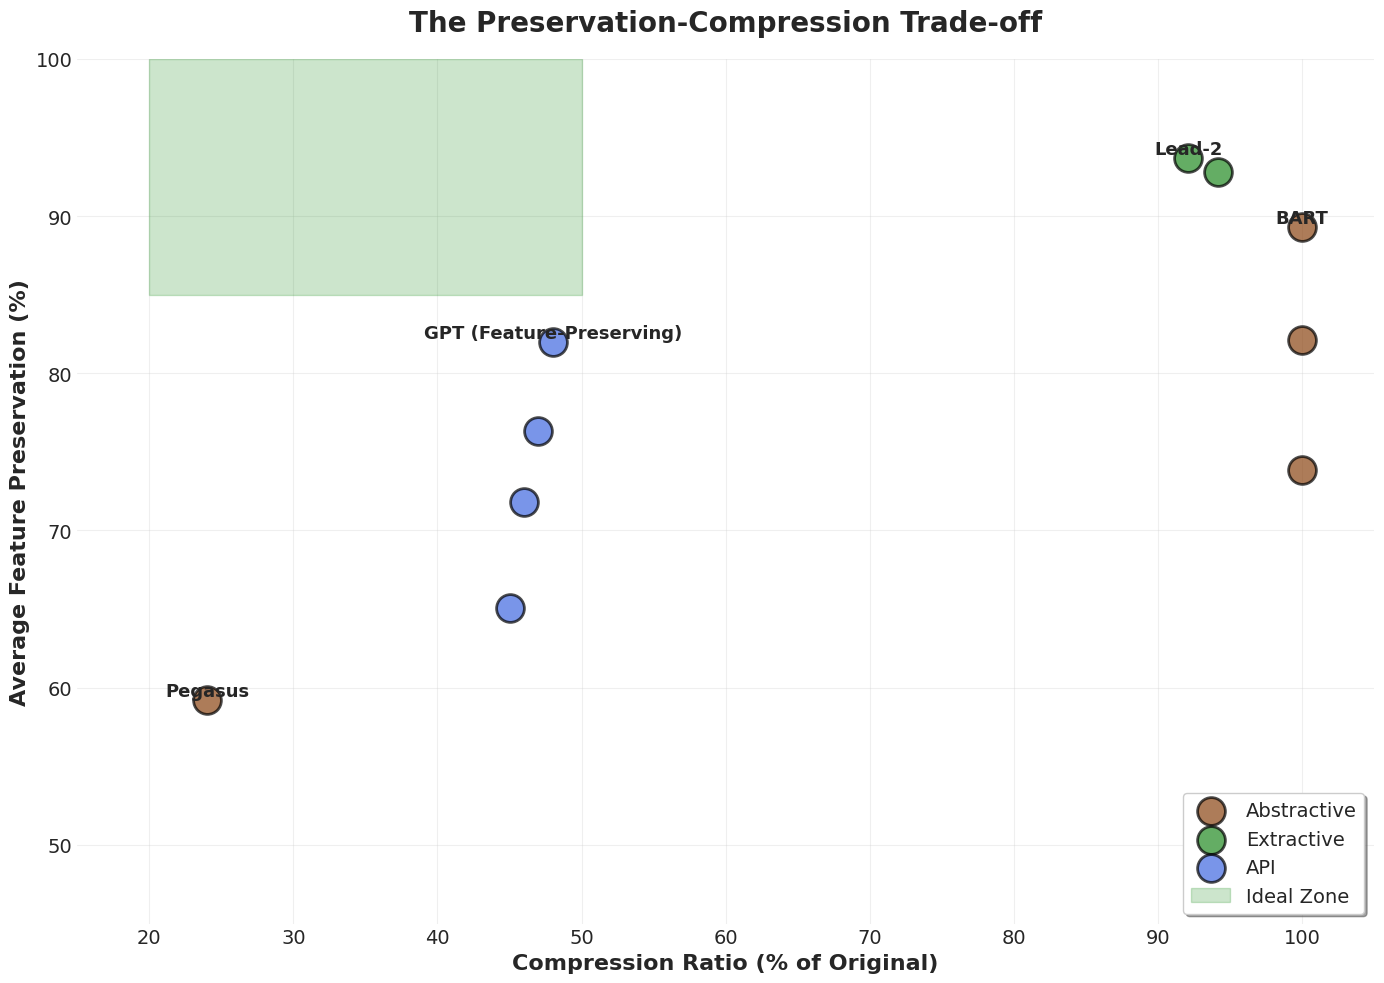

In [ ]:
fig2 = plt.figure(figsize=(14, 10))
ax2 = plt.subplot(111)
colors = {'Abstractive': '#8B4513', 'Extractive': '#228B22', 'API': '#4169E1'}
for model_type in df['Type'].unique():
    subset = df[df['Type'] == model_type]
    ax2.scatter(subset['Compression_Ratio'].clip(upper=100), subset['Avg_Preservation'],
               label=model_type, s=400, alpha=0.7, color=colors[model_type],
               edgecolors='black', linewidth=2)

    for idx, row in subset.iterrows():
        if row['Model'] in ['Pegasus', 'BART', 'Lead-2', 'GPT (Feature-Preserving)']:
            ax2.annotate(row['Model'], (min(row['Compression_Ratio'], 100), row['Avg_Preservation']),
                        fontsize=13, ha='center', va='bottom', fontweight='bold')


ideal_zone = Rectangle((20, 85), 30, 15, alpha=0.2, color='green', label='Ideal Zone')
ax2.add_patch(ideal_zone)
ax2.set_xlabel('Compression Ratio (% of Original)', fontsize=16, fontweight='bold')
ax2.set_ylabel('Average Feature Preservation (%)', fontsize=16, fontweight='bold')
ax2.set_title('The Preservation-Compression Trade-off', fontsize=20, fontweight='bold', pad=20)
ax2.legend(loc='lower right', fontsize=14, frameon=True, fancybox=True, shadow=True)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(15, 105)
ax2.set_ylim(45, 100)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

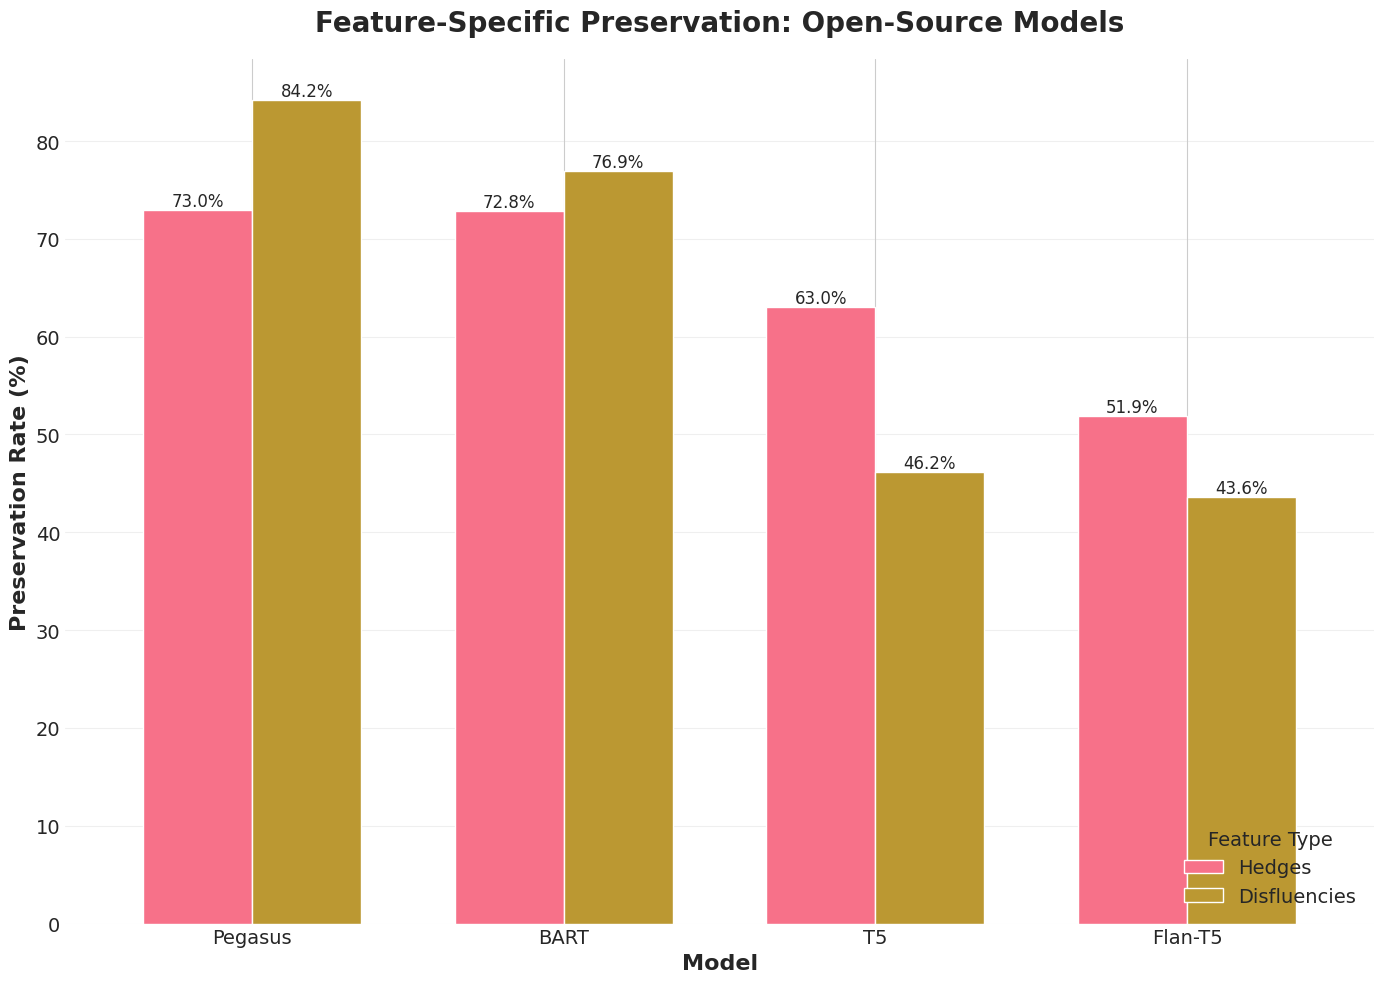

In [ ]:
# FIGURE 3: Feature-Specific Preservation Comparison
fig3 = plt.figure(figsize=(14, 10))
ax3 = plt.subplot(111)
feature_cols = ['Hedge_Preservation_Curated', 'Disfluency_Preservation_Curated']
open_source_models = ['Pegasus', 'BART', 'T5', 'Flan-T5']
feature_data = df[df['Model'].isin(open_source_models)][['Model'] + feature_cols].set_index('Model')
feature_data.columns = ['Hedges', 'Disfluencies']
feature_data.plot(kind='bar', ax=ax3, width=0.7, rot=0, figsize=(14, 10))
ax3.set_title('Feature-Specific Preservation: Open-Source Models', fontsize=20, fontweight='bold', pad=20)
ax3.set_ylabel('Preservation Rate (%)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Model', fontsize=16, fontweight='bold')
ax3.legend(title='Feature Type', loc='lower right', fontsize=14, title_fontsize=14)
ax3.grid(True, alpha=0.3, axis='y')
ax3.tick_params(axis='both', which='major', labelsize=14)

# Add value labels on bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', fontsize=12)

plt.tight_layout()
plt.show()

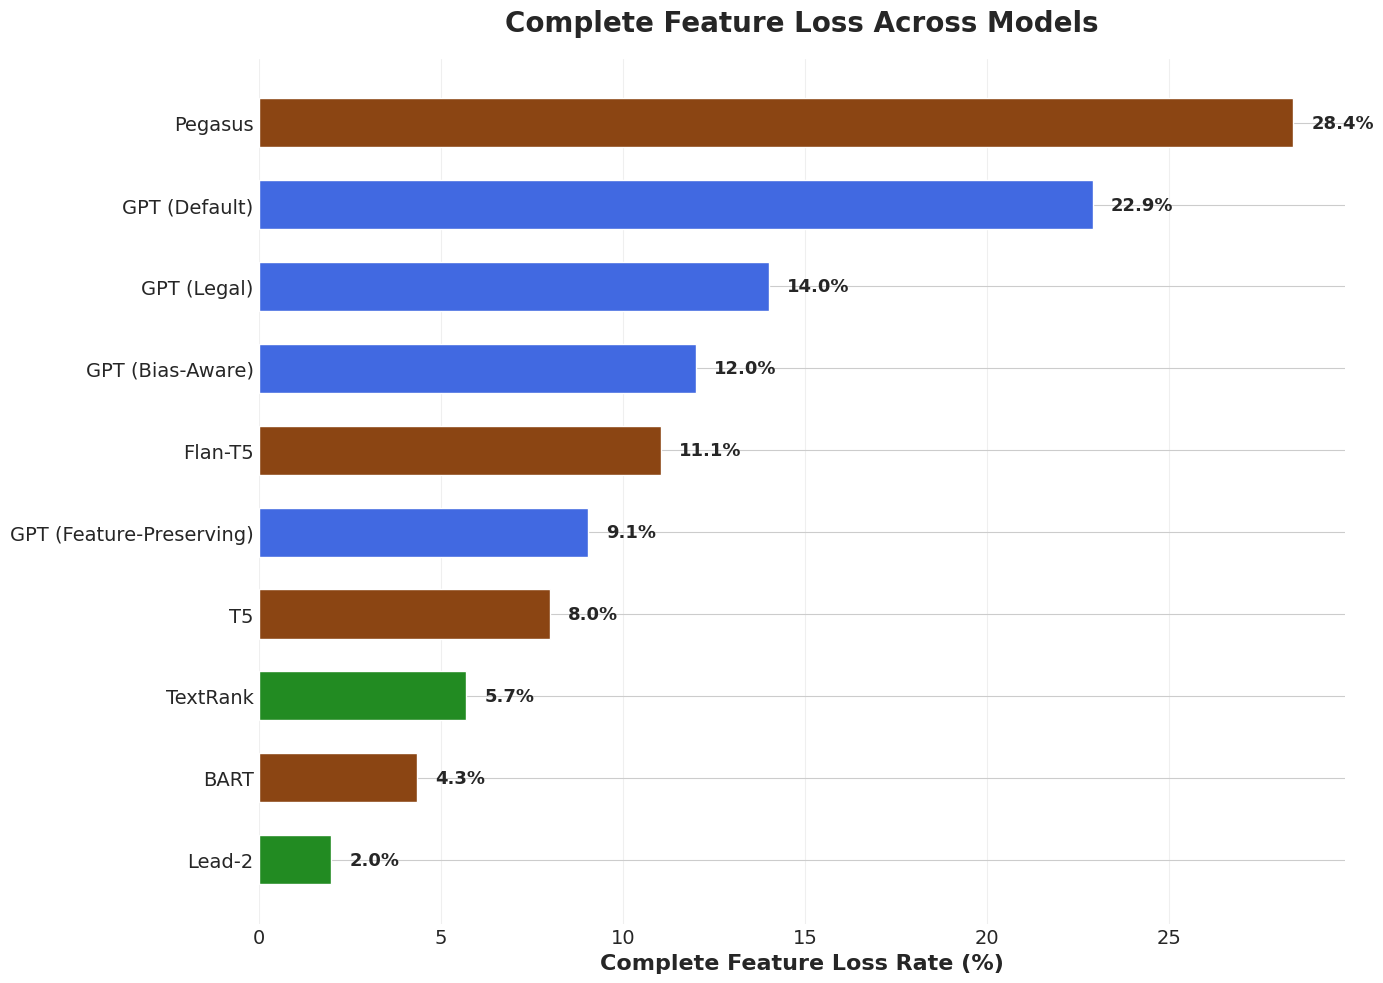

In [ ]:
# FIGURE 4: Complete Feature Loss Comparison
fig4 = plt.figure(figsize=(14, 10))
ax4 = plt.subplot(111)
loss_data = df.sort_values('Avg_Complete_Loss', ascending=True)
bars = ax4.barh(loss_data['Model'], loss_data['Avg_Complete_Loss'],
                color=[colors[t] for t in loss_data['Type']], height=0.6)
ax4.set_xlabel('Complete Feature Loss Rate (%)', fontsize=16, fontweight='bold')
ax4.set_title('Complete Feature Loss Across Models', fontsize=20, fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, axis='x')
ax4.tick_params(axis='both', which='major', labelsize=14)

# Add value labels
for i, (v, model) in enumerate(zip(loss_data['Avg_Complete_Loss'], loss_data['Model'])):
    ax4.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


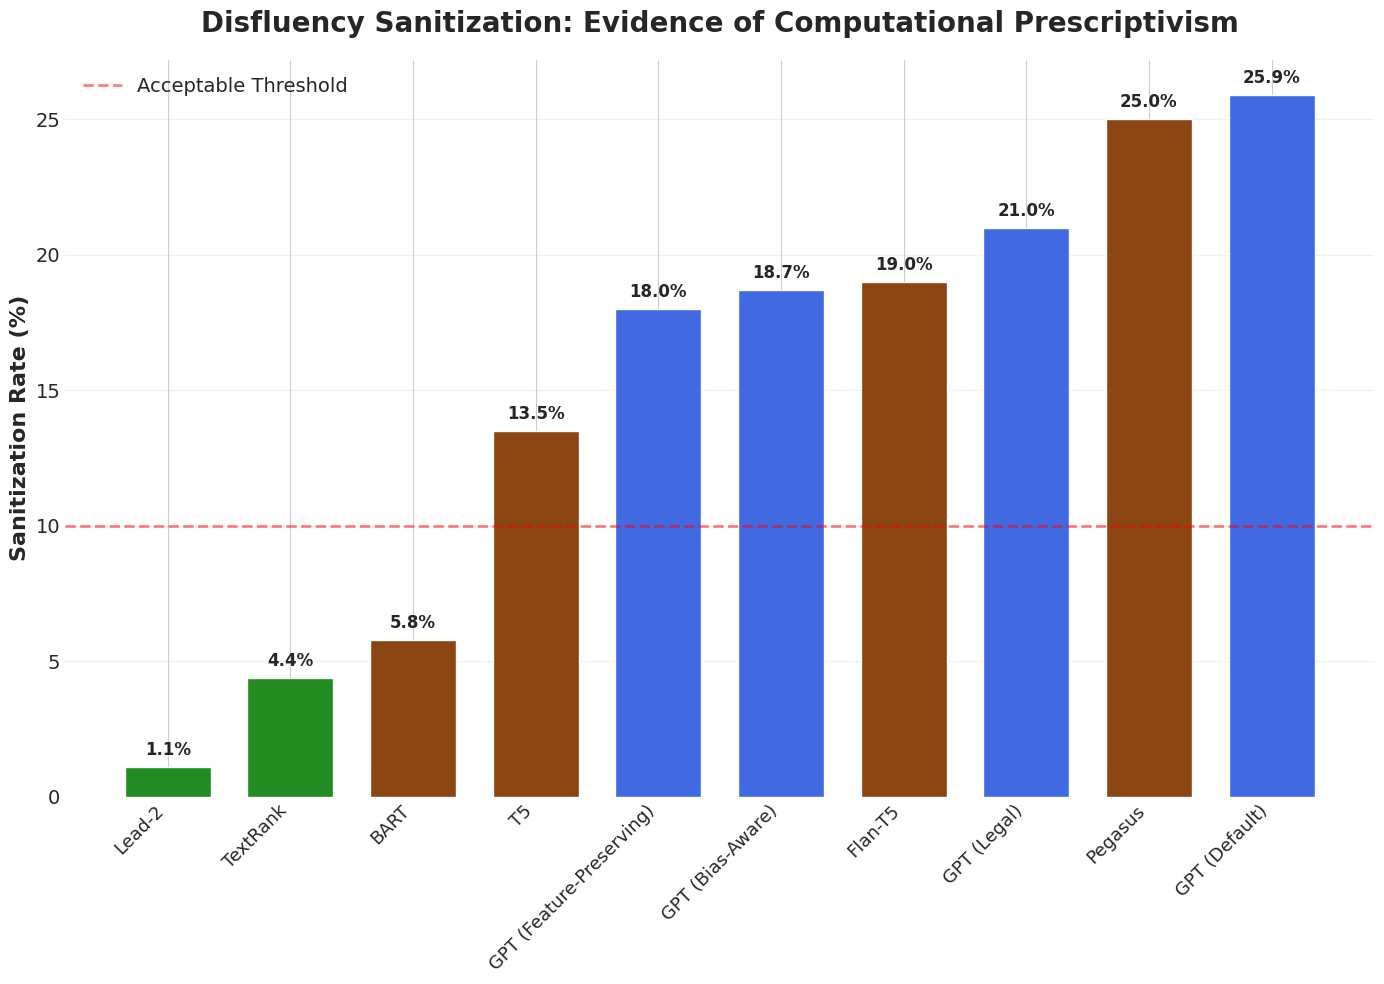

In [ ]:
# FIGURE 5: Disfluency Sanitization Rates
fig5 = plt.figure(figsize=(14, 10))
ax5 = plt.subplot(111)
sanitization_data = df.sort_values('Disfluency_Sanitization')
bars = ax5.bar(range(len(sanitization_data)), sanitization_data['Disfluency_Sanitization'],
               color=[colors[t] for t in sanitization_data['Type']], width=0.7)
ax5.set_xticks(range(len(sanitization_data)))
ax5.set_xticklabels(sanitization_data['Model'], rotation=45, ha='right', fontsize=13)
ax5.set_ylabel('Sanitization Rate (%)', fontsize=16, fontweight='bold')
ax5.set_title('Disfluency Sanitization: Evidence of Computational Prescriptivism',
             fontsize=20, fontweight='bold', pad=20)
ax5.axhline(y=10, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Acceptable Threshold')
ax5.legend(fontsize=14)
ax5.grid(True, alpha=0.3, axis='y')
ax5.tick_params(axis='y', labelsize=14)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

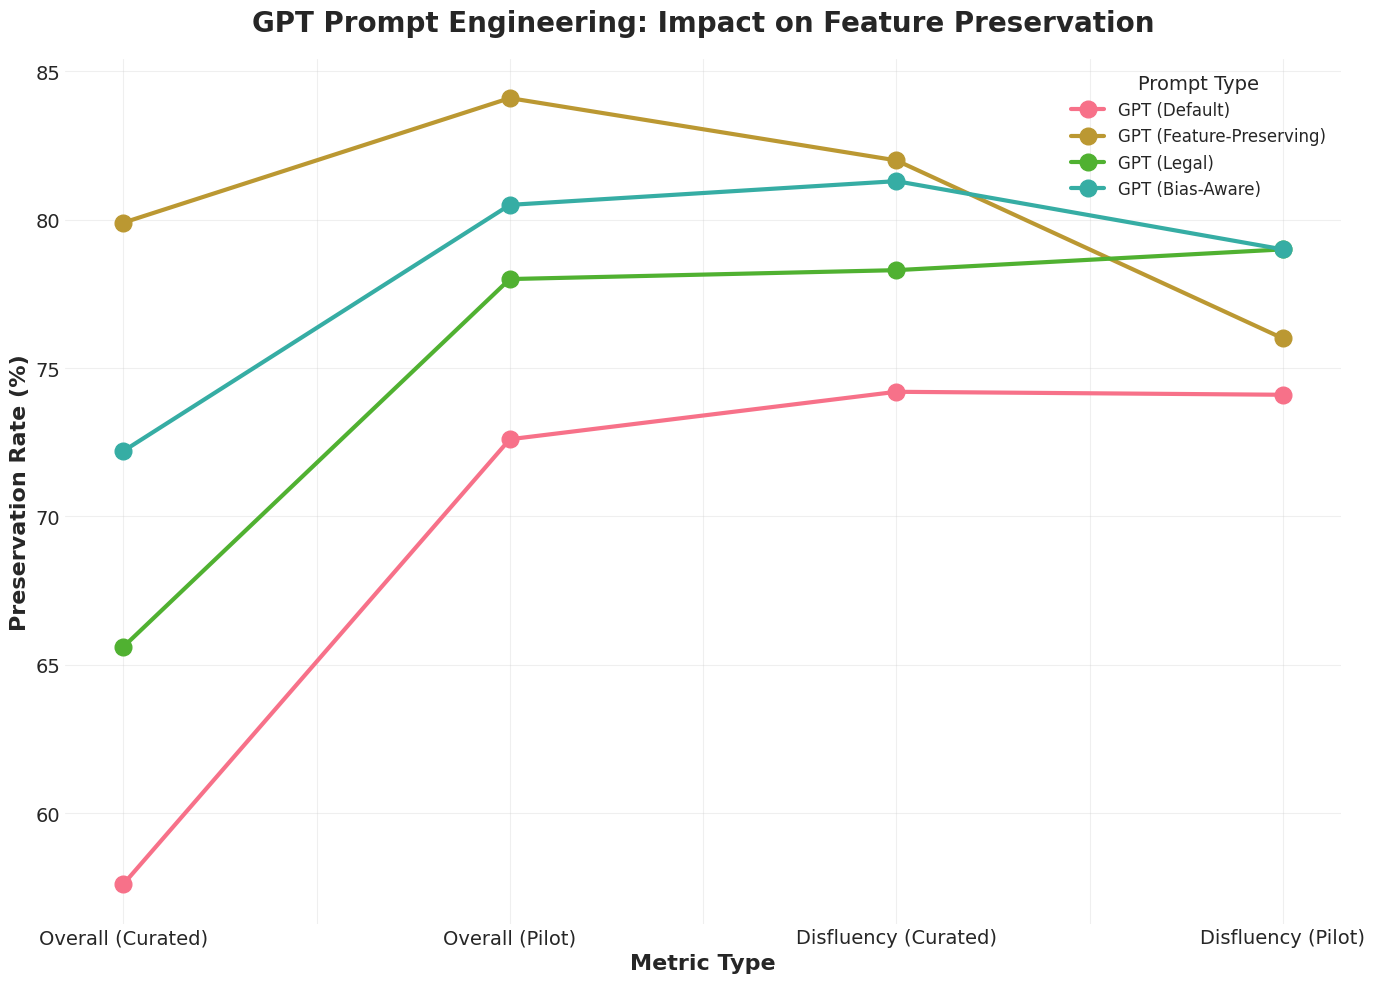

In [ ]:
# FIGURE 6: GPT Prompt Engineering Impact
fig6 = plt.figure(figsize=(14, 10))
ax6 = plt.subplot(111)
gpt_models = df[df['Model'].str.contains('GPT')]
gpt_metrics = ['Overall_Preservation_Curated', 'Overall_Preservation_Pilot',
               'Disfluency_Preservation_Curated', 'Disfluency_Preservation_Pilot']
gpt_comparison = gpt_models[['Model'] + gpt_metrics].set_index('Model')
gpt_comparison.columns = ['Overall (Curated)', 'Overall (Pilot)',
                          'Disfluency (Curated)', 'Disfluency (Pilot)']
gpt_comparison.T.plot(kind='line', ax=ax6, marker='o', linewidth=3, markersize=12)
ax6.set_title('GPT Prompt Engineering: Impact on Feature Preservation',
             fontsize=20, fontweight='bold', pad=20)
ax6.set_ylabel('Preservation Rate (%)', fontsize=16, fontweight='bold')
ax6.set_xlabel('Metric Type', fontsize=16, fontweight='bold')
ax6.legend(title='Prompt Type', fontsize=12, title_fontsize=14, loc='best')
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

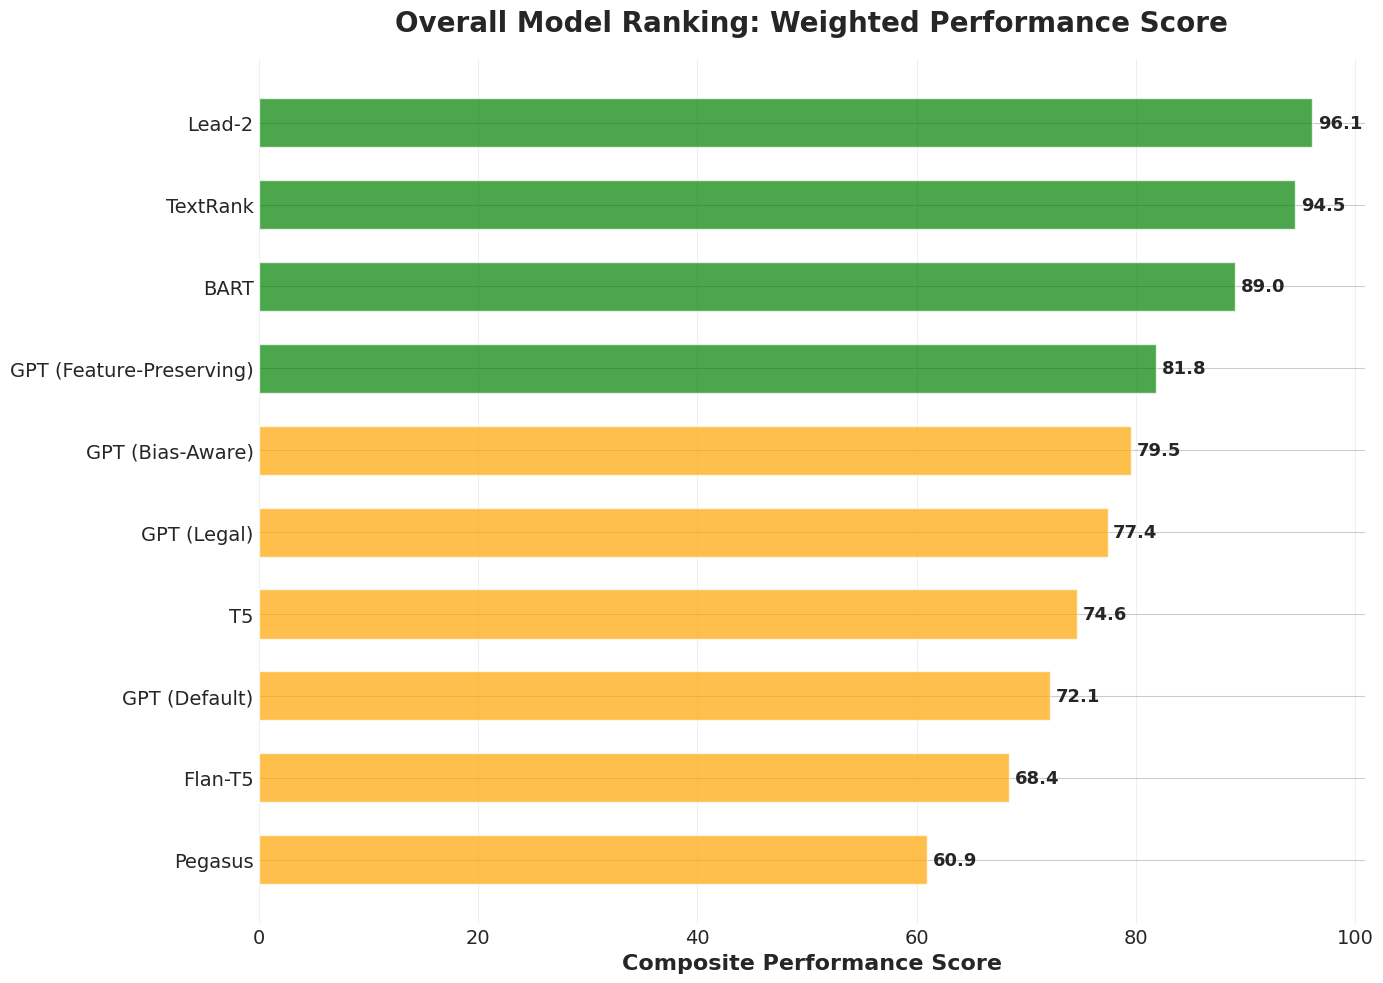

COMPREHENSIVE MODEL COMPARISON TABLE

📊 Performance Rankings:
                   Model        Type  Avg_Preservation  Avg_Disfluency  Avg_Complete_Loss  Compression_Ratio  ROUGE_L  Performance_Score
                  Lead-2  Extractive              93.7            98.0                2.0               92.1     93.0               96.1
                TextRank  Extractive              92.8            95.5                5.7               94.2     95.8               94.5
                    BART Abstractive              89.3            75.7                4.4              239.0     92.3               89.0
GPT (Feature-Preserving)         API              82.0            79.0                9.0               48.0     73.0               81.8
        GPT (Bias-Aware)         API              76.4            80.2               12.0               47.0     72.0               79.5
             GPT (Legal)         API              71.8            78.6               14.0               46.0     74.

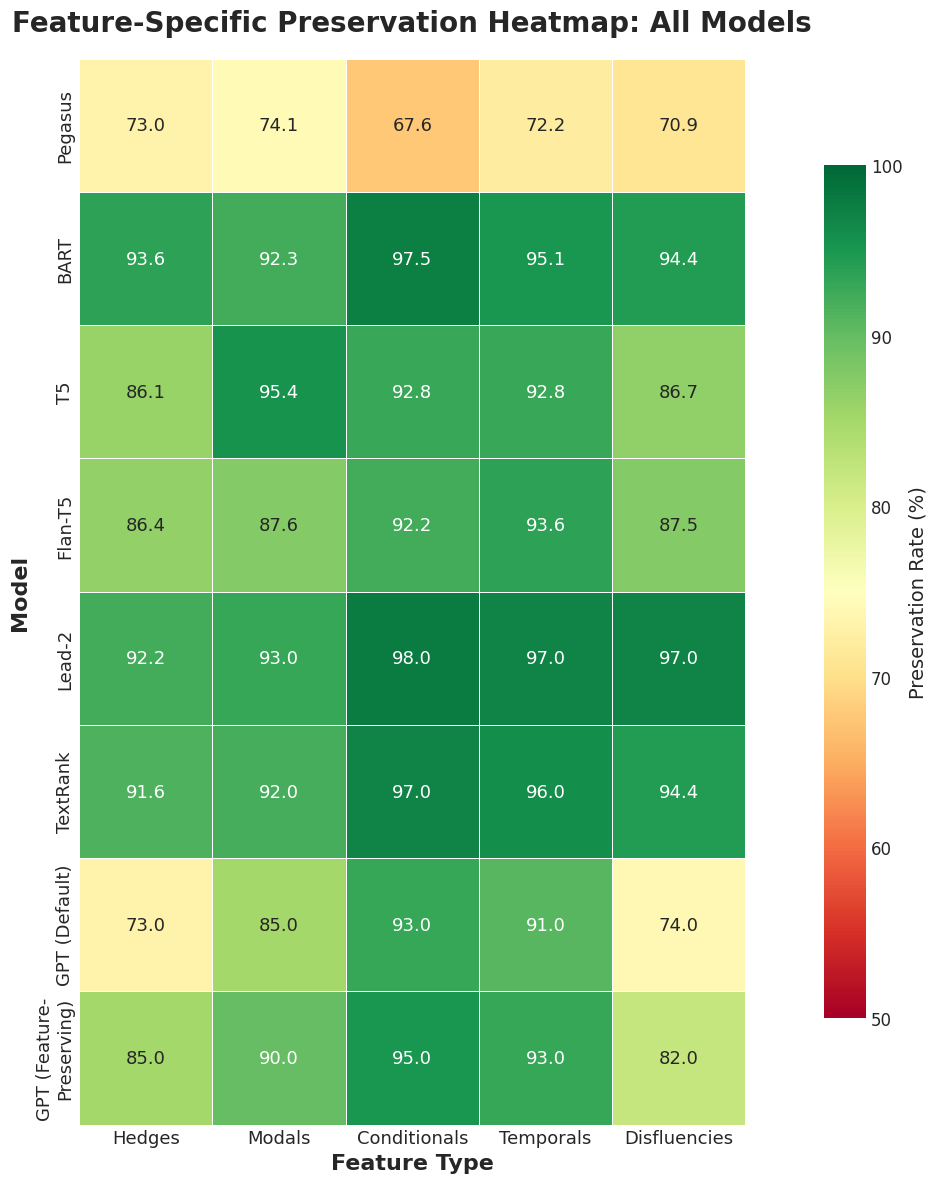

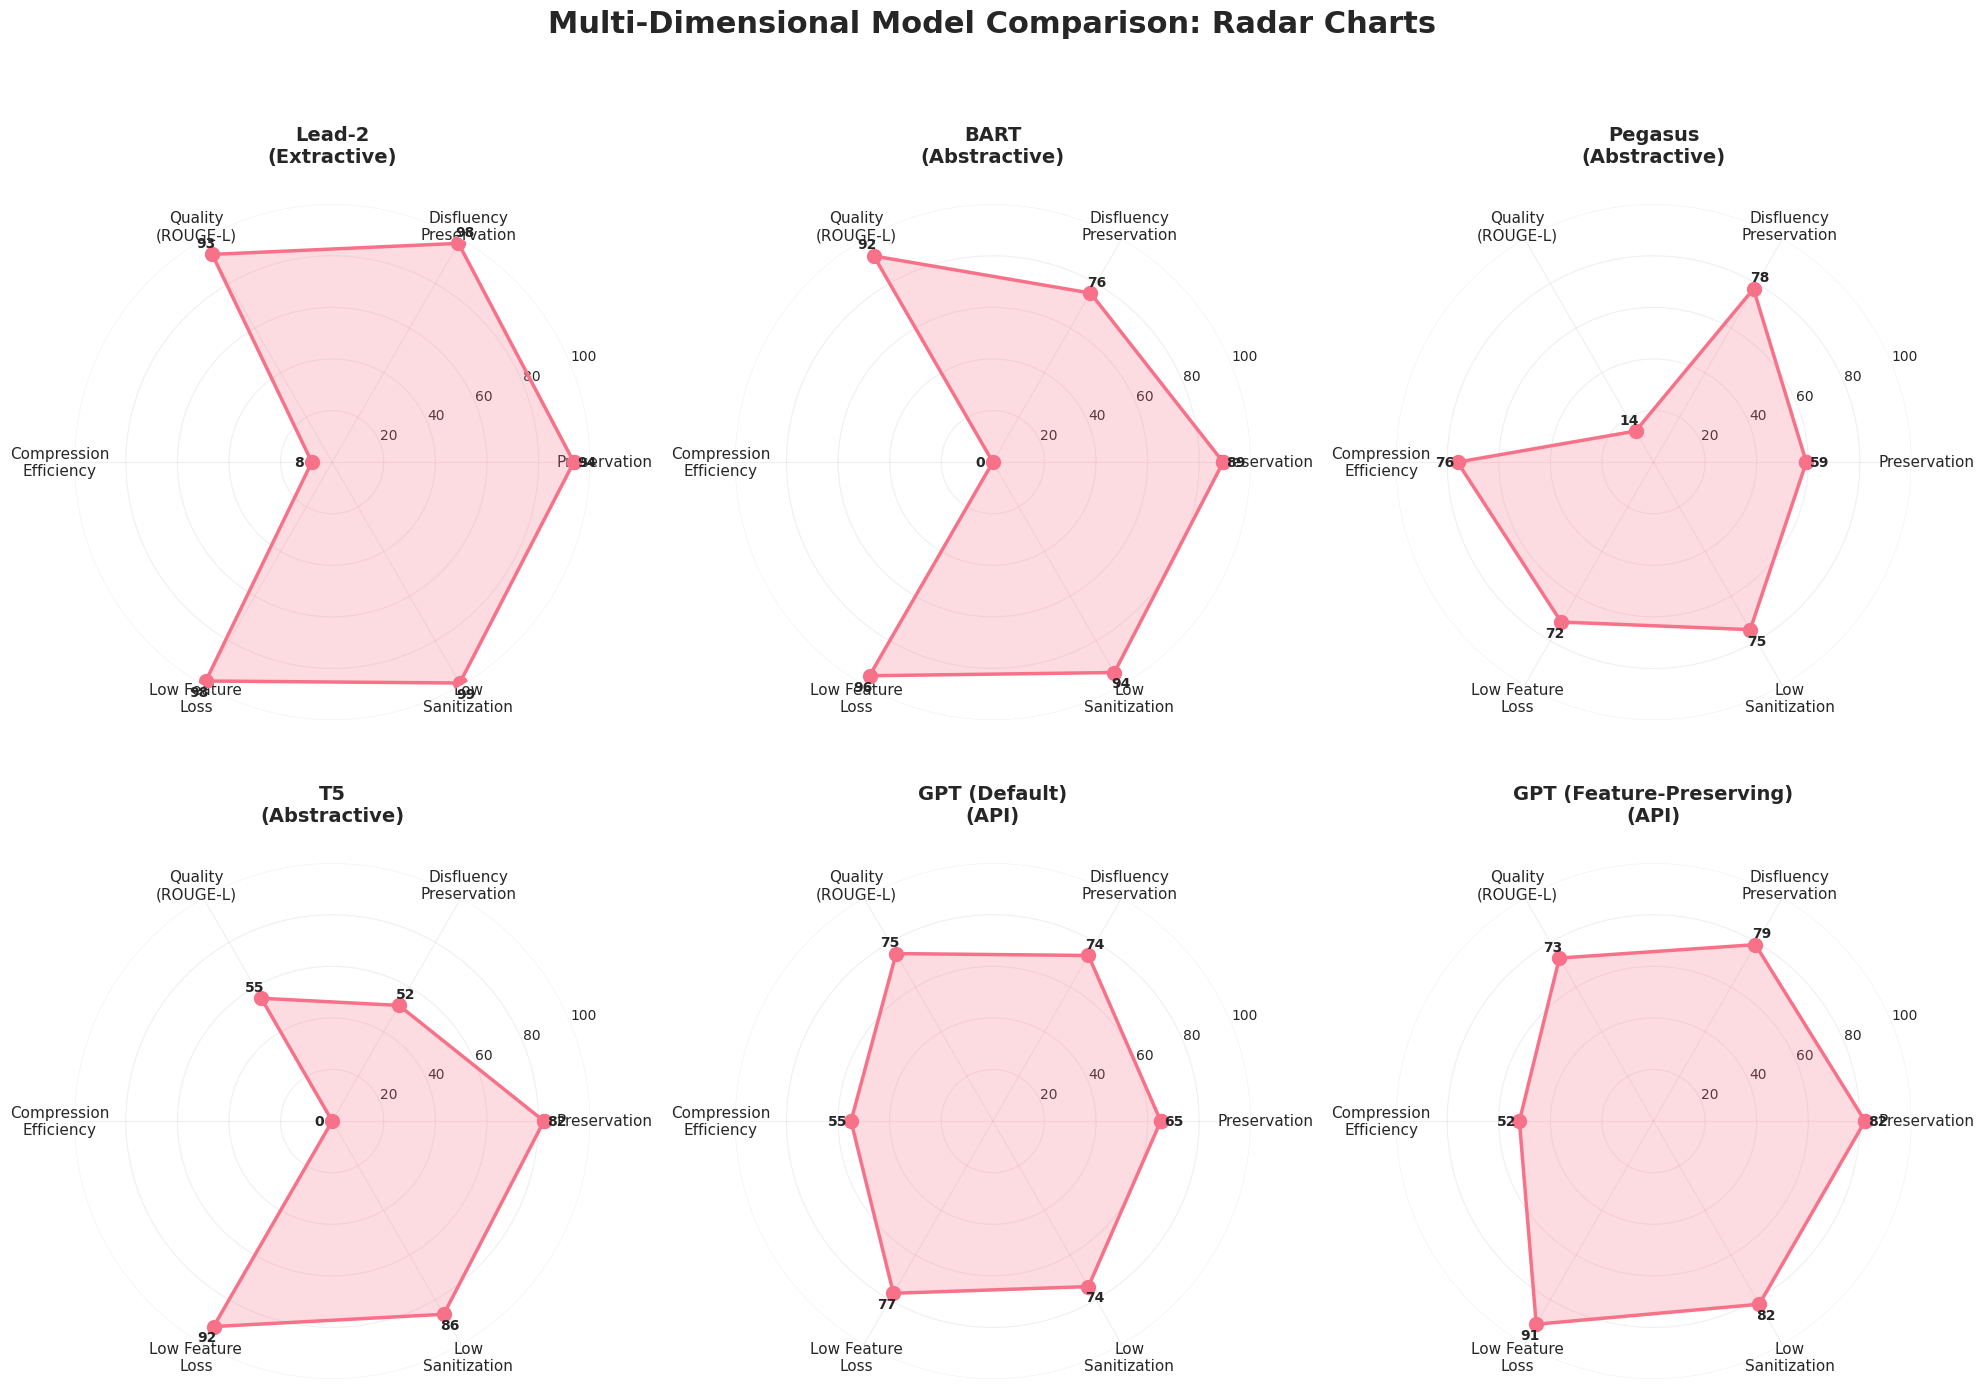


LEGAL NLP DEPLOYMENT RECOMMENDATIONS

✅ Legally Defensible:
  • Lead-2: 93.7% preservation, 2.0% complete loss, 92% compression
  • TextRank: 92.8% preservation, 5.7% complete loss, 94% compression

⚠️ Potentially Viable with Safeguards:
  • GPT (Feature-Preserving): 82.0% preservation, 9.1% complete loss, 48% compression
  • GPT (Legal): 71.8% preservation, 14.0% complete loss, 46% compression
  • GPT (Bias-Aware): 76.3% preservation, 12.0% complete loss, 47% compression

❌ Fundamentally Unsuitable:
  • Pegasus: 59.2% preservation, 28.4% complete loss, 24% compression
  • BART: 89.3% preservation, 4.3% complete loss, 239% compression
  • Flan-T5: 73.8% preservation, 11.1% complete loss, 282% compression
  • T5: 82.1% preservation, 8.0% complete loss, 239% compression
  • GPT (Default): 65.1% preservation, 22.9% complete loss, 45% compression

All visualizations complete! Each figure is displayed separately for clarity.


In [ ]:
# FIGURE 8: Comprehensive Performance Matrix
fig8 = plt.figure(figsize=(14, 10))
ax8 = plt.subplot(111)

df['Performance_Score'] = (
    df['Avg_Preservation'] * 0.3 +
    df['Avg_Disfluency'] * 0.2 +
    (100 - df['Avg_Complete_Loss']) * 0.2 +
    df['ROUGE_L'] * 0.15 +
    (100 - df['Disfluency_Sanitization']) * 0.15
)

# Sort by performance score
sorted_df = df.sort_values('Performance_Score', ascending=True)
colors_perf = ['green' if score > 80 else 'orange' if score > 60 else 'red'
               for score in sorted_df['Performance_Score']]
bars = ax8.barh(sorted_df['Model'], sorted_df['Performance_Score'],
               color=colors_perf, alpha=0.7, height=0.6)
ax8.set_xlabel('Composite Performance Score', fontsize=16, fontweight='bold')
ax8.set_title('Overall Model Ranking: Weighted Performance Score',
             fontsize=20, fontweight='bold', pad=20)
ax8.grid(True, alpha=0.3, axis='x')
ax8.tick_params(axis='both', which='major', labelsize=14)

# Add value labels
for i, (v, model) in enumerate(zip(sorted_df['Performance_Score'], sorted_df['Model'])):
    ax8.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Create detailed comparison table
print("=" * 100)
print("COMPREHENSIVE MODEL COMPARISON TABLE")
print("=" * 100)

# Create summary statistics table
summary_cols = ['Model', 'Type', 'Avg_Preservation', 'Avg_Disfluency',
                'Avg_Complete_Loss', 'Compression_Ratio', 'ROUGE_L', 'Performance_Score']
summary_df = df[summary_cols].round(1)
summary_df = summary_df.sort_values('Performance_Score', ascending=False)

print("\n📊 Performance Rankings:")
print(summary_df.to_string(index=False))


print("\n" + "=" * 100)
print("KEY FINDINGS")
print("=" * 100)

print("\n🏆 Best Performers:")
print(f"• Highest Preservation: {df.loc[df['Avg_Preservation'].idxmax(), 'Model']} ({df['Avg_Preservation'].max():.1f}%)")
print(f"• Best Compression: {df.loc[df['Compression_Ratio'].idxmin(), 'Model']} ({df['Compression_Ratio'].min():.0f}% of original)")
print(f"• Lowest Feature Loss: {df.loc[df['Avg_Complete_Loss'].idxmin(), 'Model']} ({df['Avg_Complete_Loss'].min():.1f}%)")
print(f"• Best Composite Score: {sorted_df.iloc[-1]['Model']} ({sorted_df.iloc[-1]['Performance_Score']:.1f})")

print("\n⚠️ Worst Performers:")
print(f"• Lowest Preservation: {df.loc[df['Avg_Preservation'].idxmin(), 'Model']} ({df['Avg_Preservation'].min():.1f}%)")
print(f"• Highest Feature Loss: {df.loc[df['Avg_Complete_Loss'].idxmax(), 'Model']} ({df['Avg_Complete_Loss'].max():.1f}%)")
print(f"• Highest Disfluency Sanitization: {df.loc[df['Disfluency_Sanitization'].idxmax(), 'Model']} ({df['Disfluency_Sanitization'].max():.1f}%)")

print("\n💡 Critical Insights:")
print(f"• GPT Prompt Impact: +{df[df['Model'] == 'GPT (Feature-Preserving)']['Avg_Preservation'].values[0] - df[df['Model'] == 'GPT (Default)']['Avg_Preservation'].values[0]:.1f}% preservation improvement")
print(f"• Extractive vs Abstractive Gap: {df[df['Type'] == 'Extractive']['Avg_Preservation'].mean() - df[df['Type'] == 'Abstractive']['Avg_Preservation'].mean():.1f}% preservation difference")
print(f"• Flan-T5 Paradox: {df[df['Model'] == 'T5']['Avg_Preservation'].values[0] - df[df['Model'] == 'Flan-T5']['Avg_Preservation'].values[0]:.1f}% worse than base T5")

# FIGURE 9: Feature Preservation Heatmap - All Models
fig9 = plt.figure(figsize=(16, 12))
ax9 = plt.subplot(111)

feature_types = ['Hedges', 'Modals', 'Conditionals', 'Temporals', 'Disfluencies']
models_subset = ['Pegasus', 'BART', 'T5', 'Flan-T5', 'Lead-2', 'TextRank',
                'GPT (Default)', 'GPT (Feature-\nPreserving)']

preservation_matrix = np.array([
    [73.0, 74.1, 67.6, 72.2, 70.9],  # Pegasus
    [93.6, 92.3, 97.5, 95.1, 94.4],  # BART
    [86.1, 95.4, 92.8, 92.8, 86.7],  # T5
    [86.4, 87.6, 92.2, 93.6, 87.5],  # Flan-T5
    [92.2, 93.0, 98.0, 97.0, 97.0],  # Lead-2
    [91.6, 92.0, 97.0, 96.0, 94.4],  # TextRank
    [73.0, 85.0, 93.0, 91.0, 74.0],  # GPT Default
    [85.0, 90.0, 95.0, 93.0, 82.0],  # GPT Feature-Preserving
])

# Create heatmap
sns.heatmap(preservation_matrix, annot=True, fmt='.1f', cmap='RdYlGn',
            xticklabels=feature_types, yticklabels=models_subset,
            cbar_kws={'label': 'Preservation Rate (%)', 'shrink': 0.8},
            vmin=50, vmax=100, center=75, linewidths=0.5, square=True,
            annot_kws={'fontsize': 13})
ax9.set_title('Feature-Specific Preservation Heatmap: All Models',
             fontsize=20, fontweight='bold', pad=20)
ax9.set_xlabel('Feature Type', fontsize=16, fontweight='bold')
ax9.set_ylabel('Model', fontsize=16, fontweight='bold')
ax9.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.show()

# FIGURE 10: Radar Chart for Top Models
from math import pi

fig10, axes = plt.subplots(2, 3, figsize=(20, 14), subplot_kw=dict(projection='polar'))
fig10.suptitle('Multi-Dimensional Model Comparison: Radar Charts',
              fontsize=22, fontweight='bold', y=1.02)

models_to_plot = ['Lead-2', 'BART', 'Pegasus', 'T5', 'GPT (Default)', 'GPT (Feature-Preserving)']
metrics = ['Preservation', 'Disfluency\nPreservation', 'Quality\n(ROUGE-L)',
           'Compression\nEfficiency', 'Low Feature\nLoss', 'Low\nSanitization']

for idx, (ax, model) in enumerate(zip(axes.flat, models_to_plot)):
    model_data_radar = df[df['Model'] == model].iloc[0]

    values = [
        model_data_radar['Avg_Preservation'],
        model_data_radar['Avg_Disfluency'],
        model_data_radar['ROUGE_L'],
        100 - min(model_data_radar['Compression_Ratio'], 100),  # Invert for efficiency
        100 - model_data_radar['Avg_Complete_Loss'],
        100 - model_data_radar['Disfluency_Sanitization']
    ]

    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    values += values[:1]
    angles += angles[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, markersize=10, label=model)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, size=11)
    ax.set_ylim(0, 100)
    ax.set_title(f"{model}\n({model_data_radar['Type']})",
                size=14, fontweight='bold', pad=30)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='y', labelsize=10)

    # Add value labels
    for angle, value, metric in zip(angles[:-1], values[:-1], metrics):
        ax.text(angle, value + 5, f'{value:.0f}', ha='center', va='center', size=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("LEGAL NLP DEPLOYMENT RECOMMENDATIONS")
print("=" * 100)

recommendations = {
    "✅ Legally Defensible": ["Lead-2", "TextRank"],
    "⚠️ Potentially Viable with Safeguards": ["GPT (Feature-Preserving)", "GPT (Legal)", "GPT (Bias-Aware)"],
    "❌ Fundamentally Unsuitable": ["Pegasus", "BART", "Flan-T5", "T5", "GPT (Default)"]
}

for category, models in recommendations.items():
    print(f"\n{category}:")
    for model in models:
        model_info = df[df['Model'] == model].iloc[0]
        print(f"  • {model}: {model_info['Avg_Preservation']:.1f}% preservation, "
              f"{model_info['Avg_Complete_Loss']:.1f}% complete loss, "
              f"{model_info['Compression_Ratio']:.0f}% compression")

print("\n" + "=" * 100)
print("All visualizations complete! Each figure is displayed separately for clarity.")
print("=" * 100)

COMPREHENSIVE MODEL PERFORMANCE COMPARISON


,Model,Type,Overall_Preservation_%,Hedge_Preservation_%,Disfluency_Preservation_%,Complete_Feature_Loss_%,Disfluency_Sanitization_%,Compression_Ratio_%,ROUGE_L_%,BERTScore_F1_%,Certainty_Inflation
0,Pegasus,Abstractive,59.200000,78.200000,77.500000,28.400000,25.000000,24.000000,13.900000,15.8,High
1,BART,Abstractive,89.300000,66.700000,75.700000,4.400000,5.800000,239.000000,92.300000,91.0,Low
2,T5,Abstractive,82.100000,49.900000,51.800000,8.000000,13.500000,239.000000,55.000000,55.0,Moderate
3,Flan-T5,Abstractive,73.800000,49.600000,44.200000,11.000000,19.000000,282.000000,50.000000,49.0,High
4,Lead-2,Extractive,93.200000,93.200000,97.900000,2.000000,1.100000,92.100000,93.000000,96.0,None
5,TextRank,Extractive,92.800000,92.800000,95.500000,5.700000,4.400000,94.200000,95.800000,97.8,None
6,GPT (Default),API,65.100000,81.000000,74.100000,22.900000,25.900000,45.000000,75.000000,82.0,Moderate
7,GPT (Feature-Preserving),API,82.000000,88.500000,79.000000,9.000000,18.000000,48.000000,73.000000,80.0,Low
8,GPT (Legal),API,71.800000,83.000000,78.700000,14.000000,21.000000,46.000000,74.000000,81.0,Low
9,GPT (Bias-Aware),API,76.400000,85.000000,80.100000,12.000000,18.700000,47.000000,72.000000,79.0,Low



SUMMARY STATISTICS BY MODEL TYPE
            Overall_Preservation_%       Disfluency_Preservation_%        \
                              mean   std                      mean   std   
Type                                                                       
API                           73.8   7.2                      78.0   2.7   
Abstractive                   76.1  12.9                      62.3  16.8   
Extractive                    93.0   0.3                      96.7   1.7   

            Complete_Feature_Loss_%       Disfluency_Sanitization_%       \
                               mean   std                      mean  std   
Type                                                                       
API                            14.5   6.0                      20.9  3.6   
Abstractive                    13.0  10.6                      15.8  8.2   
Extractive                      3.8   2.6                       2.8  2.3   

            Compression_Ratio_%         
           

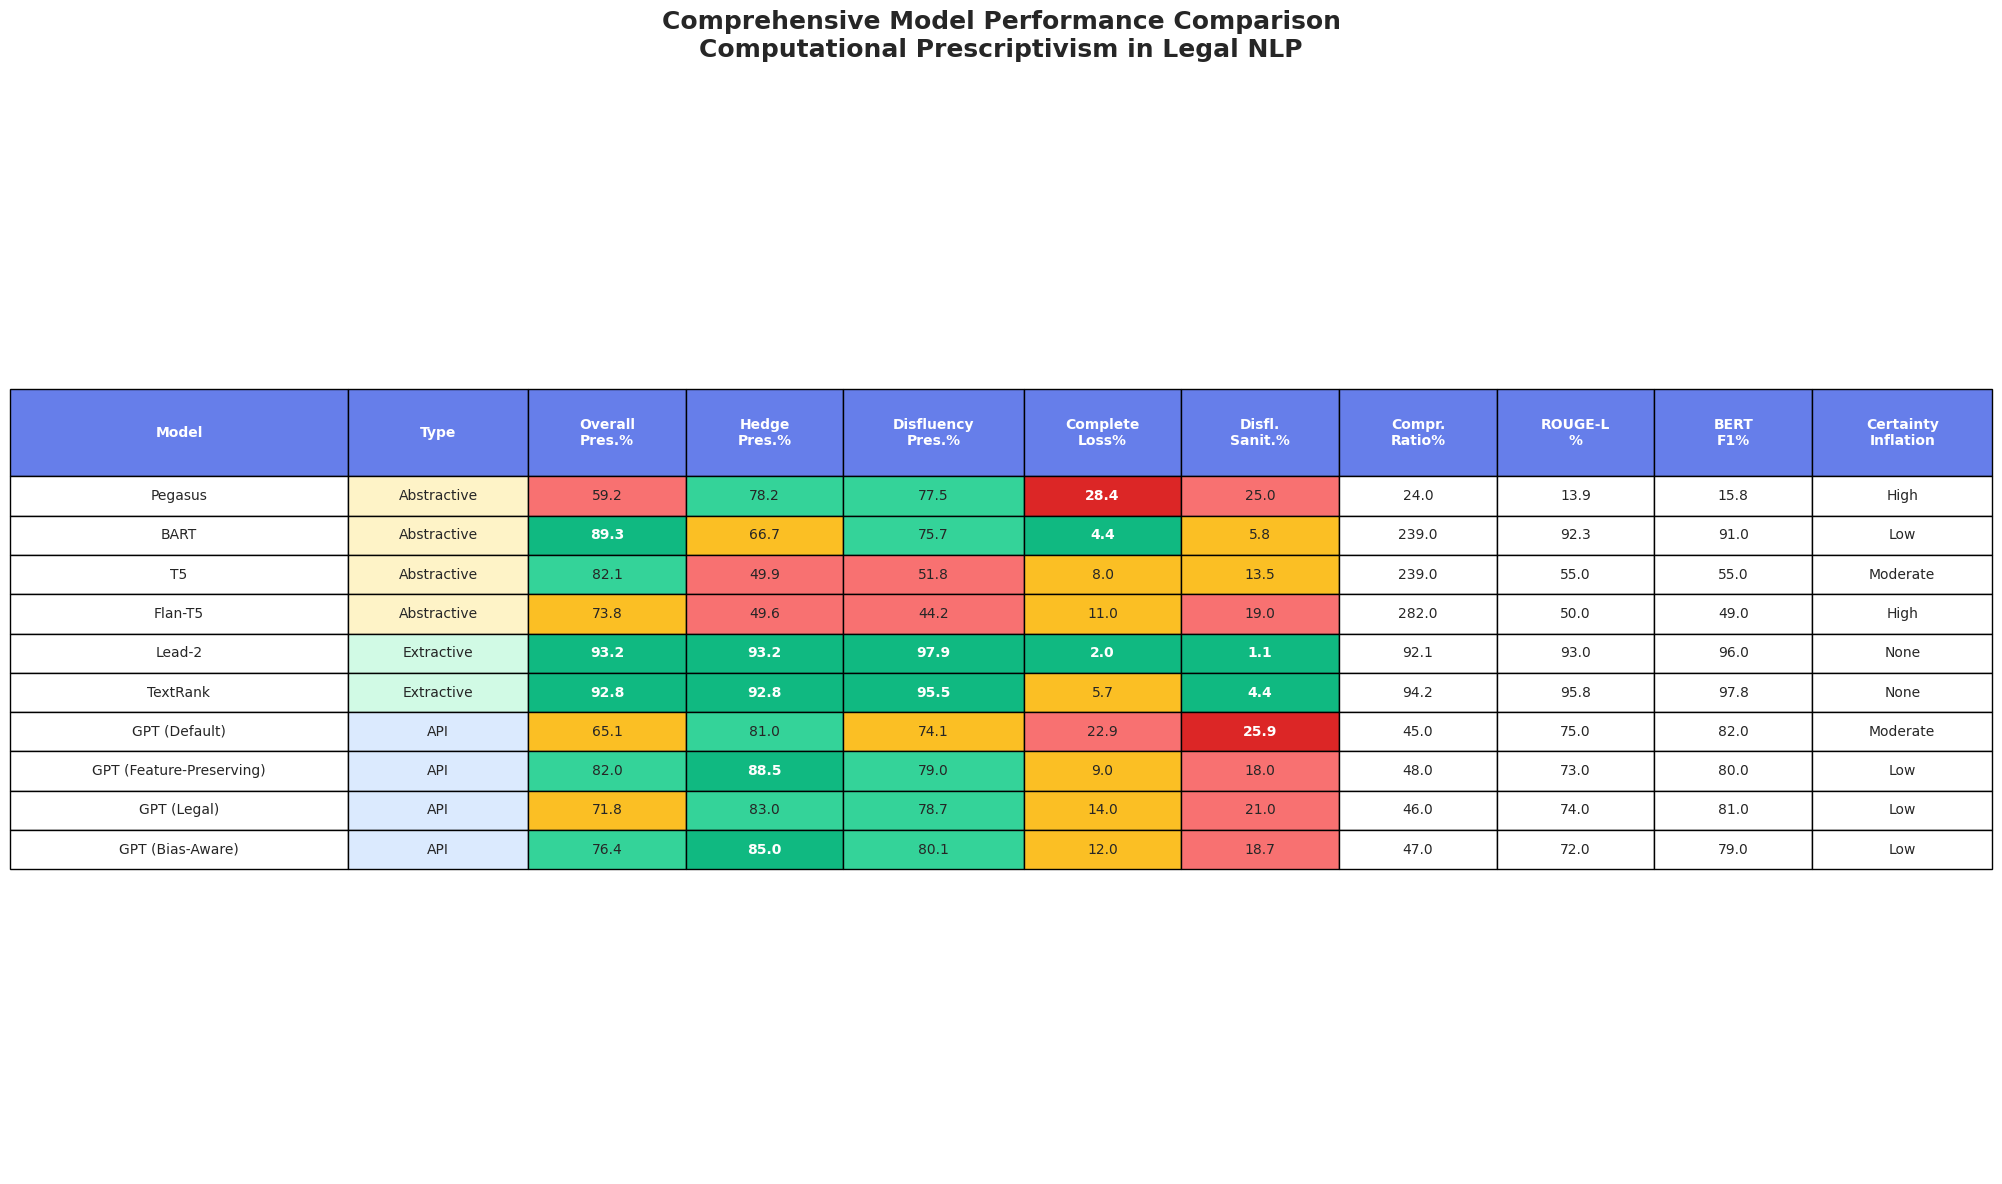


EXPORT OPTIONS
✅ Exported to model_comparison.csv
✅ Exported to model_comparison.tex
✅ Exported to model_comparison.xlsx with formatting

Analysis complete! Table saved in multiple formats.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Set pandas display options for better table viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create the comprehensive data
data = {
    'Model': [
        'Pegasus', 'BART', 'T5', 'Flan-T5',  # Abstractive
        'Lead-2', 'TextRank',  # Extractive
        'GPT (Default)', 'GPT (Feature-Preserving)', 'GPT (Legal)', 'GPT (Bias-Aware)'  # API
    ],
    'Type': [
        'Abstractive', 'Abstractive', 'Abstractive', 'Abstractive',
        'Extractive', 'Extractive',
        'API', 'API', 'API', 'API'
    ],
    'Overall_Preservation_%': [59.2, 89.3, 82.1, 73.8, 93.2, 92.8, 65.1, 82.0, 71.8, 76.4],
    'Hedge_Preservation_%': [78.2, 66.7, 49.9, 49.6, 93.2, 92.8, 81.0, 88.5, 83.0, 85.0],
    'Disfluency_Preservation_%': [77.5, 75.7, 51.8, 44.2, 97.9, 95.5, 74.1, 79.0, 78.7, 80.1],
    'Complete_Feature_Loss_%': [28.4, 4.4, 8.0, 11.0, 2.0, 5.7, 22.9, 9.0, 14.0, 12.0],
    'Disfluency_Sanitization_%': [25.0, 5.8, 13.5, 19.0, 1.1, 4.4, 25.9, 18.0, 21.0, 18.7],
    'Compression_Ratio_%': [24, 239, 239, 282, 92.1, 94.2, 45, 48, 46, 47],
    'ROUGE_L_%': [13.9, 92.3, 55.0, 50.0, 93.0, 95.8, 75.0, 73.0, 74.0, 72.0],
    'BERTScore_F1_%': [15.8, 91.0, 55.0, 49.0, 96.0, 97.8, 82.0, 80.0, 81.0, 79.0],
    'Certainty_Inflation': ['High', 'Low', 'Moderate', 'High', 'None', 'None', 'Moderate', 'Low', 'Low', 'Low']
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to apply color coding based on performance
def style_performance(val, metric):
    """Apply color coding based on metric and value"""
    if pd.isna(val) or isinstance(val, str):
        return ''

    # Define thresholds for different metrics
    if 'Preservation' in metric:
        if val >= 85: return 'background-color: #10b981; color: white; font-weight: bold'
        elif val >= 75: return 'background-color: #34d399; color: white'
        elif val >= 65: return 'background-color: #fbbf24; color: black'
        elif val >= 50: return 'background-color: #f87171; color: white'
        else: return 'background-color: #dc2626; color: white; font-weight: bold'

    elif 'Loss' in metric or 'Sanitization' in metric:
        if val <= 5: return 'background-color: #10b981; color: white; font-weight: bold'
        elif val <= 10: return 'background-color: #34d399; color: white'
        elif val <= 15: return 'background-color: #fbbf24; color: black'
        elif val <= 25: return 'background-color: #f87171; color: white'
        else: return 'background-color: #dc2626; color: white; font-weight: bold'

    elif 'Compression' in metric:
        if val > 100: return 'background-color: #fee2e2; color: #dc2626; font-weight: bold'
        elif val <= 50: return 'background-color: #10b981; color: white; font-weight: bold'
        elif val <= 100: return 'background-color: #fbbf24; color: black'

    return ''

# Create styled DataFrame for display
styled_df = df.style.apply(lambda x: [style_performance(v, x.name) for v in x], axis=0)

# Format numbers to 1 decimal place
for col in df.columns:
    if col not in ['Model', 'Type', 'Certainty_Inflation']:
        styled_df = styled_df.format({col: '{:.1f}'})

# Display the styled table
print("=" * 150)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 150)
display(styled_df)

# Create summary statistics by model type
print("\n" + "=" * 150)
print("SUMMARY STATISTICS BY MODEL TYPE")
print("=" * 150)

summary = df.groupby('Type').agg({
    'Overall_Preservation_%': ['mean', 'std'],
    'Disfluency_Preservation_%': ['mean', 'std'],
    'Complete_Feature_Loss_%': ['mean', 'std'],
    'Disfluency_Sanitization_%': ['mean', 'std'],
    'Compression_Ratio_%': ['mean', 'std']
}).round(1)

print(summary)

# Create a visualization of the table data using matplotlib
fig, ax = plt.subplots(figsize=(20, 12))
ax.axis('tight')
ax.axis('off')

# Prepare data for table
table_data = []
headers = ['Model', 'Type', 'Overall\nPres.%', 'Hedge\nPres.%', 'Disfluency\nPres.%',
           'Complete\nLoss%', 'Disfl.\nSanit.%', 'Compr.\nRatio%', 'ROUGE-L\n%',
           'BERT\nF1%', 'Certainty\nInflation']

for _, row in df.iterrows():
    table_data.append([
        row['Model'],
        row['Type'],
        f"{row['Overall_Preservation_%']:.1f}",
        f"{row['Hedge_Preservation_%']:.1f}",
        f"{row['Disfluency_Preservation_%']:.1f}",
        f"{row['Complete_Feature_Loss_%']:.1f}",
        f"{row['Disfluency_Sanitization_%']:.1f}",
        f"{row['Compression_Ratio_%']:.1f}",
        f"{row['ROUGE_L_%']:.1f}",
        f"{row['BERTScore_F1_%']:.1f}",
        row['Certainty_Inflation']
    ])

# Create table
table = ax.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center',
                colWidths=[0.15, 0.08, 0.07, 0.07, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Color code cells based on performance
for i in range(len(table_data)):
    for j in range(len(headers)):
        cell = table[(i+1, j)]

        # Header styling
        if i == -1:
            cell.set_facecolor('#667eea')
            cell.set_text_props(weight='bold', color='white')
        # Model type coloring
        elif j == 1:
            if table_data[i][j] == 'Abstractive':
                cell.set_facecolor('#fef3c7')
            elif table_data[i][j] == 'Extractive':
                cell.set_facecolor('#d1fae5')
            elif table_data[i][j] == 'API':
                cell.set_facecolor('#dbeafe')
        # Performance coloring for numeric columns
        elif j in [2, 3, 4]:  # Preservation columns
            try:
                val = float(table_data[i][j])
                if val >= 85:
                    cell.set_facecolor('#10b981')
                    cell.set_text_props(color='white', weight='bold')
                elif val >= 75:
                    cell.set_facecolor('#34d399')
                elif val >= 65:
                    cell.set_facecolor('#fbbf24')
                else:
                    cell.set_facecolor('#f87171')
            except:
                pass
        elif j in [5, 6]:  # Loss/Sanitization columns
            try:
                val = float(table_data[i][j])
                if val <= 5:
                    cell.set_facecolor('#10b981')
                    cell.set_text_props(color='white', weight='bold')
                elif val <= 15:
                    cell.set_facecolor('#fbbf24')
                elif val <= 25:
                    cell.set_facecolor('#f87171')
                else:
                    cell.set_facecolor('#dc2626')
                    cell.set_text_props(color='white', weight='bold')
            except:
                pass

# Header row styling
for j in range(len(headers)):
    cell = table[(0, j)]
    cell.set_facecolor('#667eea')
    cell.set_text_props(weight='bold', color='white')
    cell.set_height(0.08)

plt.title('Comprehensive Model Performance Comparison\nComputational Prescriptivism in Legal NLP',
         fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('model_comparison_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Export to different formats
print("\n" + "=" * 150)
print("EXPORT OPTIONS")
print("=" * 150)

# Export to CSV
df.to_csv('model_comparison.csv', index=False)
print("✅ Exported to model_comparison.csv")

# Export to LaTeX
latex_table = df.to_latex(index=False,
                          caption="Comprehensive Model Performance Comparison",
                          label="tab:model_comparison",
                          column_format='l' + 'c'*(len(df.columns)-1))
with open('model_comparison.tex', 'w') as f:
    f.write(latex_table)
print("✅ Exported to model_comparison.tex")

# Export to Excel with formatting
with pd.ExcelWriter('model_comparison.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Model Comparison', index=False)

    # Get the workbook and worksheet
    workbook = writer.book
    worksheet = writer.sheets['Model Comparison']

    # Add formatting
    from openpyxl.styles import PatternFill, Font, Alignment

    # Header formatting
    header_fill = PatternFill(start_color='667eea', end_color='667eea', fill_type='solid')
    header_font = Font(bold=True, color='FFFFFF')

    for cell in worksheet[1]:
        cell.fill = header_fill
        cell.font = header_font
        cell.alignment = Alignment(horizontal='center')

    # Auto-adjust column widths
    for column in worksheet.columns:
        max_length = 0
        column = [cell for cell in column]
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = min(max_length + 2, 20)
        worksheet.column_dimensions[column[0].column_letter].width = adjusted_width

print("✅ Exported to model_comparison.xlsx with formatting")

print("\n" + "=" * 150)
print("Analysis complete! Table saved in multiple formats.")
print("=" * 150)